In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df = sns.load_dataset('mpg')

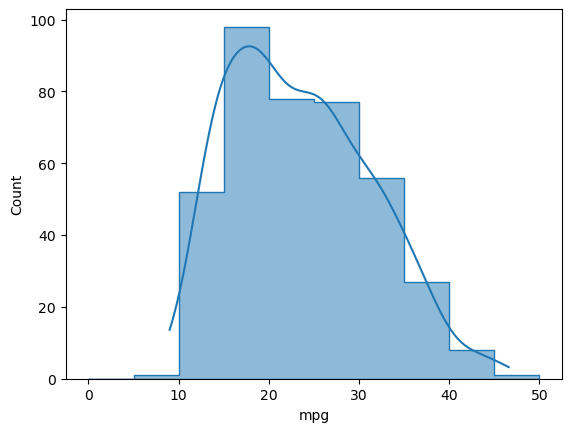

skewness 0.45706634399491913


In [17]:
df.head()
sns.histplot(df.mpg,kde=True,bins=range(0,51,5),element='step')
plt.show()
print('skewness',df.mpg.skew())

In [33]:
df[df.name.duplicated()]
# idea 
# feature_engg
df.name.str.split(expand=True) # to extract company names 
df.name.str.split(expand=True)[0].value_counts().head() # to extract company names 

0
ford         51
chevrolet    43
plymouth     31
amc          28
dodge        28
Name: count, dtype: int64

In [43]:
# feature encoding
# for future use
print(df.origin.value_counts())
print('-'*50)
print(df.origin.value_counts().to_dict())

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64
--------------------------------------------------
{'usa': 249, 'japan': 79, 'europe': 70}


In [54]:
# new column
df['origin_encode'] = df.origin.map(df.origin.value_counts().to_dict())
df.columns
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_encode
285,17.0,8,305.0,130.0,3840,15.4,79,usa,chevrolet caprice classic,249
81,28.0,4,97.0,92.0,2288,17.0,72,japan,datsun 510 (sw),79
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl,249
34,16.0,6,225.0,105.0,3439,15.5,71,usa,plymouth satellite custom,249
178,23.0,4,120.0,88.0,2957,17.0,75,europe,peugeot 504,70


In [55]:
# seeking info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     392 non-null    float64
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin         398 non-null    object 
 8   name           398 non-null    object 
 9   origin_encode  398 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


- presence of null values

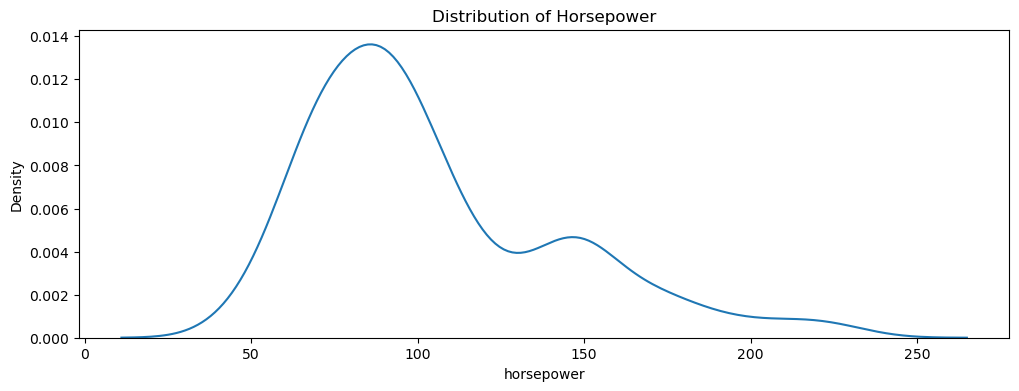

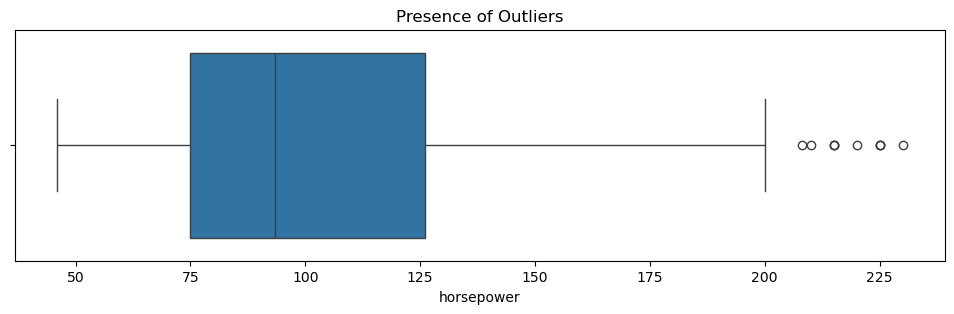

skewness 1.0873262824048695
--------------------------------------------------


mpg              0.000000
cylinders        0.000000
displacement     0.000000
horsepower       1.507538
weight           0.000000
acceleration     0.000000
model_year       0.000000
origin           0.000000
name             0.000000
origin_encode    0.000000
dtype: float64

In [71]:
plt.figure(figsize=(12,4))
sns.kdeplot(df.horsepower)
plt.title('Distribution of Horsepower')
plt.show()
plt.figure(figsize=(12,3))
sns.boxplot(x=df.horsepower)
plt.title('Presence of Outliers')
plt.show()
print('skewness',df.horsepower.skew())
# null value count 
print('-'*50)
df.isnull().mean()*100

- since, horsepower is right skewed and percentage of null values is below 5%
- we can fill null values with median

In [75]:
df.horsepower.median()
df.horsepower = df.horsepower.fillna(93.5)
df.isnull().sum().sum()

0

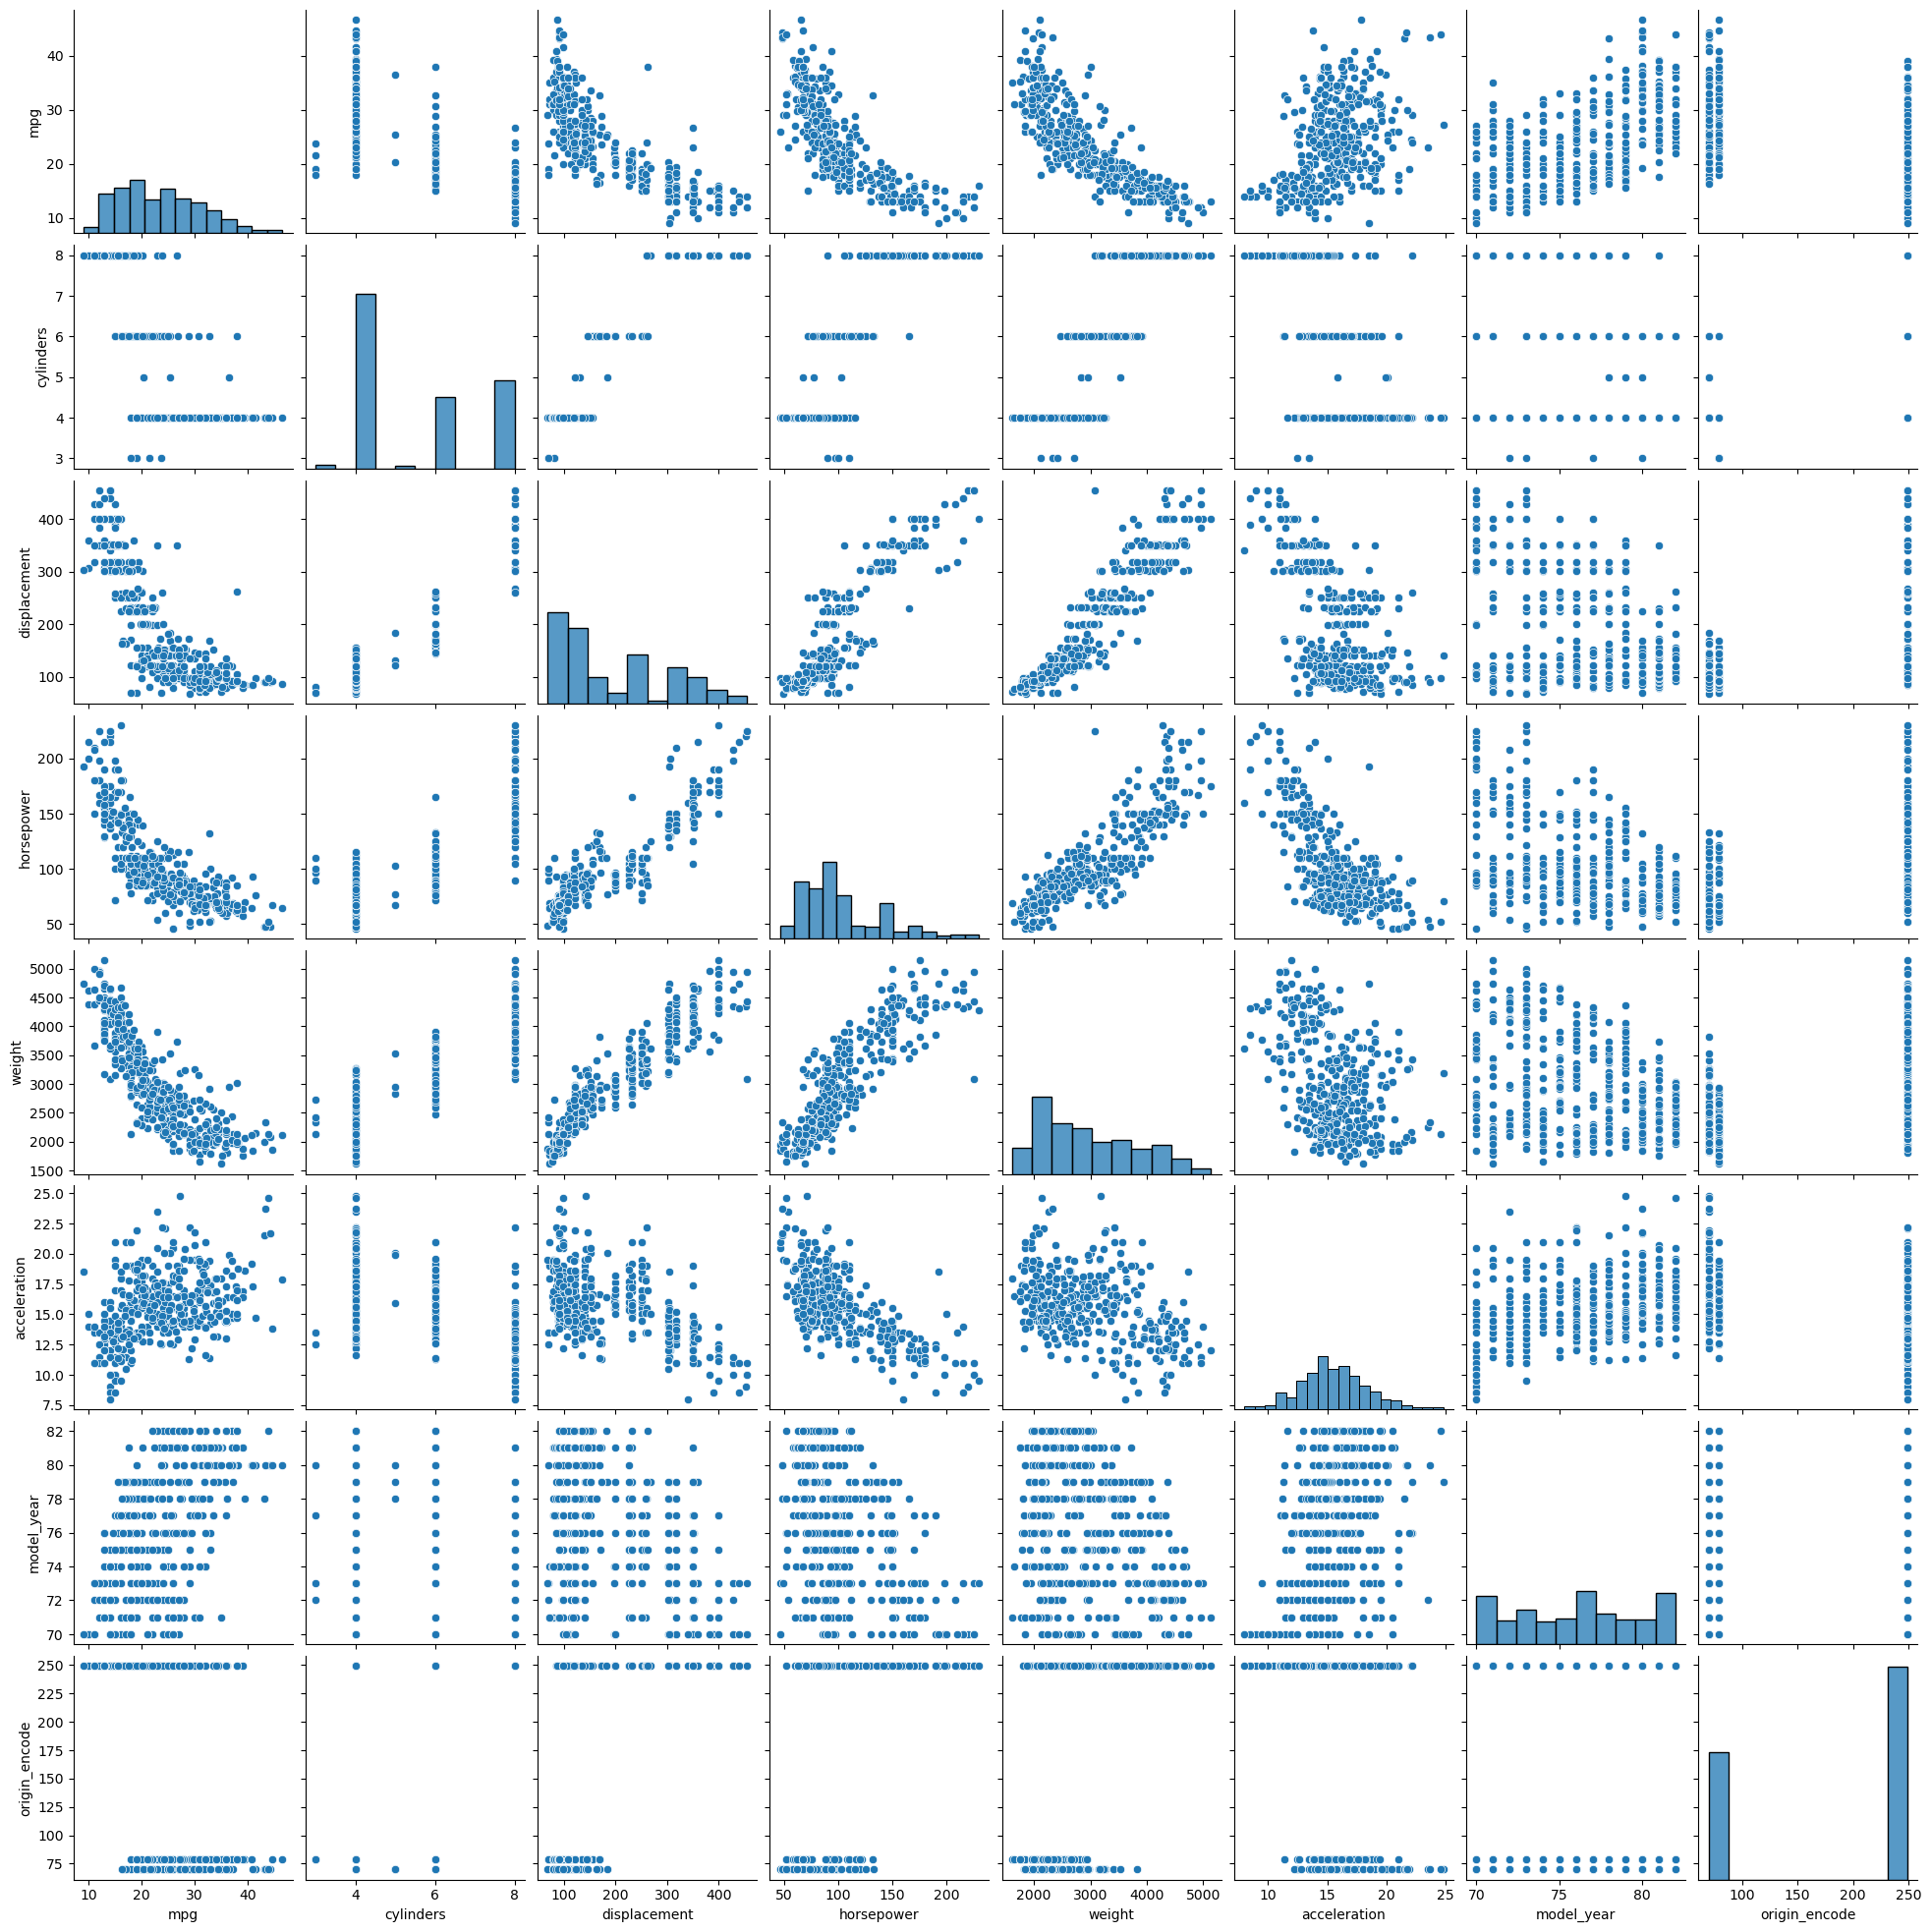

In [78]:
sns.pairplot(df)
plt.show()

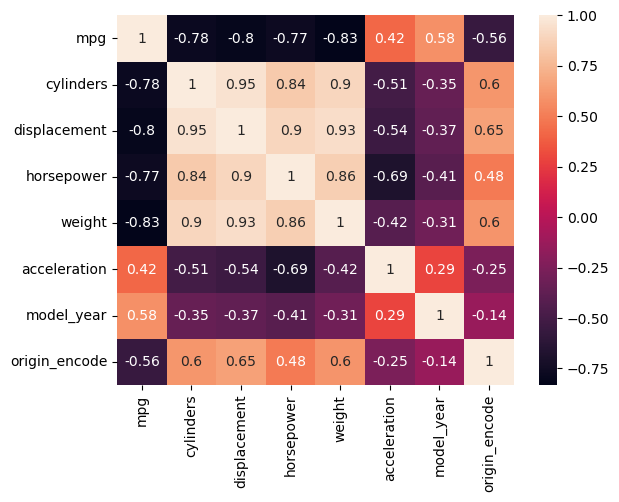

In [82]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [87]:
# train test split 
y = df.mpg 
df.columns
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']]

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [90]:
print('train size\t',x_train.shape[0])
print('test size\t',x_test.shape[0])

train size	 318
test size	 80


In [91]:
# linear regression 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [92]:
lr.fit(x_train,y_train)

LinearRegression()

In [95]:
y_pred = lr.predict(x_test)

from sklearn.metrics import r2_score,mean_absolute_error

In [105]:
print('r2\t\t',r2_score(y_test,y_pred)*100)
print('absolute error\t',mean_absolute_error(y_test,y_pred))

r2		 82.44245330943365
absolute error	 2.466780800452029


In [106]:
# if the model is overfitting 
print('training score\t',lr.score(x_train,y_train)*100)
print('testing score\t',lr.score(x_test,y_test)*100)

training score	 80.3897815724515
testing score	 82.44245330943365
